In [1]:
import glob
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv()

files = glob.glob(os.getenv("OD_FILE"))

# Load the data from the first file in the list
data = pd.read_csv(files[0])

# Print the first few rows of the data
data.head()

print(files)

['/mnt/g/Taipei_Metro/OD/202307.csv']


In [70]:
# Basic exploratory data analysis

# Number of unique values in each column
unique_values = data.nunique()

# Range of number of people
people_range = [data['人次'].min(), data['人次'].max()]

# Check for missing values
missing_values = data.isnull().sum()

unique_values, people_range, missing_values

in_stations = data['進站'].unique()
out_stations = data['出站'].unique()
in_stations[~np.isin(in_stations, out_stations)]

array(['十四張', '秀朗橋', '景平', '中和', '橋和', '中原', '板新', '新埔民生', '幸福', '新北產業園區'],
      dtype=object)

# Popular Routes

In [71]:
popular_routes = data.groupby(['進站', '出站'])['人次'].sum().reset_index()

# Sort the routes in descending order of the number of people
popular_routes = popular_routes.sort_values('人次', ascending=False)

# Print the top 10 most popular routes
popular_routes.head(10)

,進站,出站,人次
11479,西門,台北車站,241775
3768,台北車站,西門,227823
3700,台北車站,台北101/世貿,170489
3379,台北101/世貿,台北車站,168485
3721,台北車站,市政府,167213
5647,市政府,台北車站,160577
6295,忠孝復興,台北車站,113398
3726,台北車站,忠孝復興,111564
787,中山,台北車站,111005
9751,淡水,台北車站,109325


# Peak times

In [5]:
peak_times = data.groupby('時段')['人次'].sum().reset_index()

# Sort the time periods in descending order of the number of people
peak_times = peak_times.sort_values('人次', ascending=False)

# Print the top 10 peak travel times
peak_times.head(10)

,時段,人次
15,18,6464215
5,8,5805038
14,17,4816786
16,19,4472700
6,9,3537130
13,16,3297239
10,13,3037296
17,20,2921675
9,12,2905674
12,15,2860235


In [59]:
morning_peak_hours = range(7, 10)
evening_peak_hours = range(17, 20)

# Group the data by station and time period and sum the number of people entering and exiting each station
data_grouped = data.groupby(['進站', '出站', '時段'])['人次'].sum().reset_index()

# Note: Get the intersection of the stations where people enter and exit (entry and exit stations are different in some of the data for some weird reason)
intersection = np.intersect1d(data['進站'].unique(), data['出站'].unique())

# Calculate the number of people entering and exiting each station during the morning and evening peak hours
entry_morning = data_grouped[data_grouped['時段'].isin(morning_peak_hours)].groupby('進站')['人次'].sum()
entry_evening = data_grouped[data_grouped['時段'].isin(evening_peak_hours)].groupby('進站')['人次'].sum()
exit_morning = data_grouped[data_grouped['時段'].isin(morning_peak_hours)].groupby('出站')['人次'].sum()
exit_evening = data_grouped[data_grouped['時段'].isin(evening_peak_hours)].groupby('出站')['人次'].sum()

# Identify the stations that are likely to be residential areas
residential_stations = (exit_morning[intersection] < entry_morning[intersection]) & (entry_evening[intersection] < exit_evening[intersection])

# Print the stations that are likely to be residential areas
residential_stations[residential_stations].index

Index(['七張', '三和國中', '三民高中', '三重', '三重國小', '丹鳳', '亞東醫院', '內湖', '六張犁', '北投',
       '南勢角', '南港', '台北橋', '唭哩岸', '圓山', '土城', '大坪林', '大湖公園', '大直', '小碧潭', '府中',
       '後山埤', '徐匯中學', '復興崗', '文德', '新埔', '新店', '新店區公所', '新莊', '明德', '景安', '景美',
       '木柵', '東湖', '板橋', '永安市場', '永寧', '永春', '江子翠', '海山', '淡水', '竹圍', '紅樹林',
       '芝山', '菜寮', '萬芳社區', '萬芳醫院', '萬隆', '葫洲', '蘆洲', '輔大', '辛亥', '迴龍', '頂埔',
       '頂溪', '頭前庄', '麟光', '龍山寺'],
      dtype='object', name='出站')

In [7]:
data['進站'].unique()


array(['松山機場', '中山國中', '南京復興', '忠孝復興', '大安', '科技大樓', '六張犁', '麟光', '辛亥',
       '萬芳醫院', '萬芳社區', '木柵', '動物園', '大直', '劍南路', '西湖', '港墘', '文德', '內湖',
       '大湖公園', '葫洲', '東湖', '南港軟體園區', '南港展覽館', '小碧潭', '新店', '新店區公所', '七張',
       '大坪林', '景美', '萬隆', '公館', '台電大樓', '古亭', '中正紀念堂', '小南門', '頂溪',
       '永安市場', '景安', '南勢角', '台大醫院', '台北車站', '中山', '雙連', '民權西路', '圓山',
       '劍潭', '士林', '芝山', '明德', '石牌', '唭哩岸', '奇岩', '北投', '新北投', '復興崗',
       '忠義', '關渡', '竹圍', '紅樹林', '淡水', '頂埔', '永寧', '土城', '海山', '亞東醫院',
       '府中', 'BL板橋', '新埔', '江子翠', '龍山寺', '西門', '善導寺', '忠孝新生', '忠孝敦化',
       '國父紀念館', '市政府', '永春', '後山埤', '昆陽', '南港', '象山', '台北101/世貿', '信義安和',
       '大安森林公園', '北門', '松江南京', '台北小巨蛋', '南京三民', '松山', '輔大', '新莊', '頭前庄',
       '先嗇宮', '三重', '菜寮', '台北橋', '大橋頭站', '中山國小', '行天宮', '東門', '蘆洲',
       '三民高中', '徐匯中學', '三和國中', '三重國小', '迴龍', '丹鳳', '十四張', '秀朗橋', '景平',
       '中和', '橋和', '中原', '板新', 'Y板橋', '新埔民生', '幸福', '新北產業園區'],
      dtype=object)

In [8]:
# Identify the stations that are likely to be commercial areas
commercial_stations = (entry_morning[intersection] < exit_morning[intersection]) & (exit_evening[intersection] < entry_evening[intersection])

# Print the stations that are likely to be commercial areas
commercial_stations[commercial_stations].index

Index(['中山', '中山國中', '中山國小', '中正紀念堂', '信義安和', '先嗇宮', '公館', '劍南路', '北門', '南京三民',
       '南京復興', '南港展覽館', '南港軟體園區', '古亭', '台北101/世貿', '台北小巨蛋', '台大醫院', '台電大樓',
       '善導寺', '國父紀念館', '大安', '大安森林公園', '小南門', '市政府', '忠孝復興', '忠孝敦化', '忠孝新生',
       '忠義', '新北投', '昆陽', '東門', '松山機場', '松江南京', '民權西路', '港墘', '科技大樓', '行天宮',
       '西湖', '象山', '關渡', '雙連'],
      dtype='object', name='進站')

In [9]:
# Group the data by hour and calculate the total number of people traveling each hour
hourly_travel_pattern = data.groupby('時段')['人次'].sum()

# Print the hourly travel pattern
hourly_travel_pattern

時段
0      351907
1       10175
5        1224
6      749280
7     2665405
8     5805038
9     3537130
10    2603057
11    2739471
12    2905674
13    3037296
14    2836674
15    2860235
16    3297239
17    4816786
18    6464215
19    4472700
20    2921675
21    2748423
22    2209934
23     950993
Name: 人次, dtype: int64

# Visualizations

In [10]:
import matplotlib.font_manager as font_manager
font_dirs = ['fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans TC'

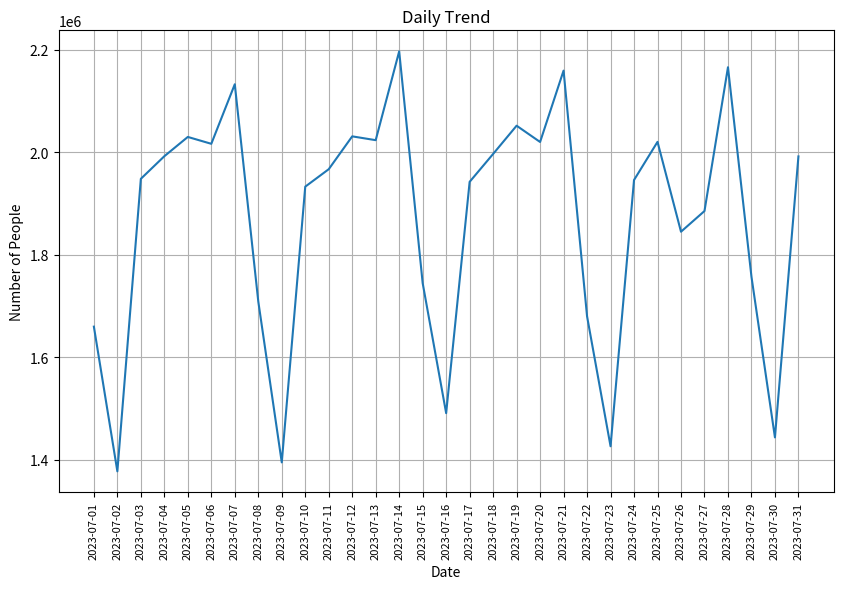

In [11]:
import matplotlib.pyplot as plt

# Group the data by date and calculate the total number of people for each date
daily_data = data.groupby('日期')['人次'].sum()

# Plot the daily trend
plt.figure(figsize=(10, 6))
plt.plot(daily_data)
plt.xlabel('Date')
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel('Number of People')
plt.title('Daily Trend')
plt.grid(True)
plt.show()

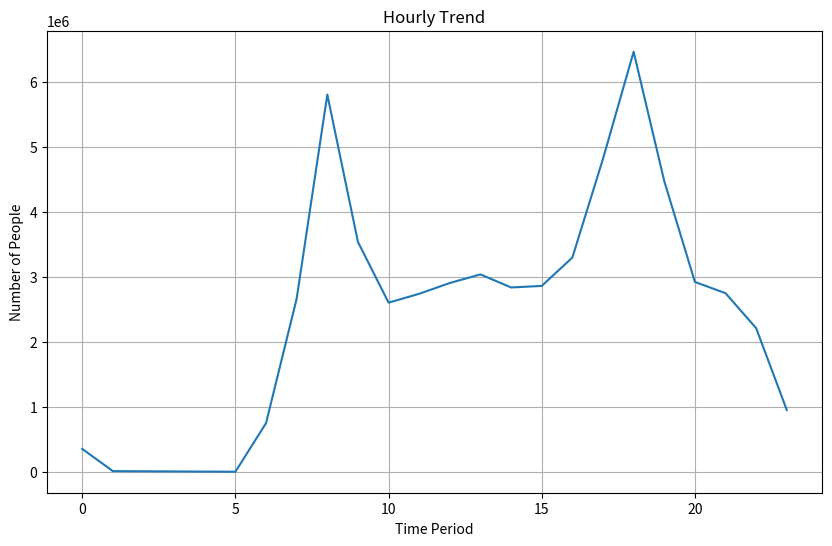

In [12]:
# Group the data by time period and calculate the total number of people for each time period
hourly_data = data.groupby('時段')['人次'].sum()

# Plot the hourly trend
plt.figure(figsize=(10, 6))
plt.plot(hourly_data)
plt.xlabel('Time Period')
plt.ylabel('Number of People')
plt.title('Hourly Trend')
plt.grid(True)
plt.show()

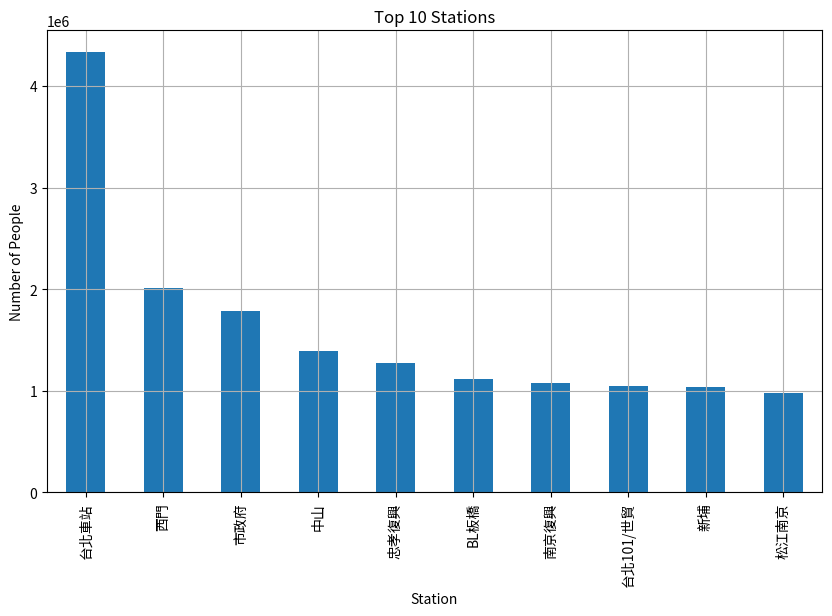

In [13]:
# Group the data by entry station and calculate the total number of people for each station
station_data = data.groupby('進站')['人次'].sum()

# Sort the stations by total number of people and select the top 10
top_stations = station_data.sort_values(ascending=False).head(10)

# Plot the top 10 stations
plt.figure(figsize=(10, 6))
top_stations.plot(kind='bar')
plt.xlabel('Station')
plt.ylabel('Number of People')
plt.title('Top 10 Stations')
plt.grid(True)
plt.show()

In [14]:
data.groupby('進站')['人次'].sum()

進站
BL板橋    1113265
Y板橋       63970
七張       400153
三和國中     331266
三民高中     309328
         ...   
頂埔       252001
頂溪       906051
頭前庄      133377
麟光       117864
龍山寺      770497
Name: 人次, Length: 119, dtype: int64

In [15]:
data.groupby('出站')['人次'].sum()


出站
BL板橋    1207350
G大坪林     516363
O景安      573641
O頭前庄     123168
七張       423236
         ...   
雙連       630012
頂埔       243997
頂溪       940973
麟光       112242
龍山寺      754673
Name: 人次, Length: 108, dtype: int64

In [17]:
data.groupby(['進站', '出站'])['人次'].sum().reset_index()

,進站,出站,人次
0,BL板橋,BL板橋,5880
1,BL板橋,G大坪林,2006
2,BL板橋,O景安,750
3,BL板橋,O頭前庄,0
4,BL板橋,七張,2833
...,...,...,...
12847,龍山寺,雙連,9056
12848,龍山寺,頂埔,6291
12849,龍山寺,頂溪,6997
12850,龍山寺,麟光,1179


In [48]:
start_time = 7
end_time = 10
start_station = "石牌"

fil = (data["進站"] == start_station) & (data["時段"] >= start_time) & (data["時段"] < end_time)
output = data.loc[fil, :].groupby(['出站'])['人次'].sum().reset_index()
output.to_dict('list')

{'出站': ['BL板橋',
  'G大坪林',
  'O景安',
  'O頭前庄',
  '七張',
  '三和國中',
  '三民高中',
  '三重',
  '三重國小',
  '中山',
  '中山國中',
  '中山國小',
  '中正紀念堂',
  '丹鳳',
  '亞東醫院',
  '信義安和',
  '先嗇宮',
  '內湖',
  '公館',
  '六張犁',
  '劍南路',
  '劍潭',
  '動物園',
  '北投',
  '北門',
  '南京三民',
  '南京復興',
  '南勢角',
  '南港',
  '南港展覽館',
  '南港軟體園區',
  '古亭',
  '台北101/世貿',
  '台北小巨蛋',
  '台北橋',
  '台北車站',
  '台大醫院',
  '台電大樓',
  '唭哩岸',
  '善導寺',
  '國父紀念館',
  '圓山',
  '土城',
  '士林',
  '大安',
  '大安森林公園',
  '大橋頭站',
  '大湖公園',
  '大直',
  '奇岩',
  '小南門',
  '小碧潭',
  '市政府',
  '府中',
  '後山埤',
  '徐匯中學',
  '復興崗',
  '忠孝復興',
  '忠孝敦化',
  '忠孝新生',
  '忠義',
  '文德',
  '新北投',
  '新埔',
  '新店',
  '新店區公所',
  '新莊',
  '昆陽',
  '明德',
  '景美',
  '木柵',
  '東湖',
  '東門',
  '松山',
  '松山機場',
  '松江南京',
  '民權西路',
  '永安市場',
  '永寧',
  '永春',
  '江子翠',
  '海山',
  '淡水',
  '港墘',
  '石牌',
  '科技大樓',
  '竹圍',
  '紅樹林',
  '芝山',
  '菜寮',
  '萬芳社區',
  '萬芳醫院',
  '萬隆',
  '葫洲',
  '蘆洲',
  '行天宮',
  '西湖',
  '西門',
  '象山',
  '輔大',
  '辛亥',
  '迴龍',
  '關渡',
  '雙連',
  '頂埔',
  '頂溪',
  '麟光',
  '龍山寺'],
 '人次': [1360,
  1811,
  9

In [55]:
data['出站'].unique()

array(['松山機場', '中山國中', '南京復興', '忠孝復興', '大安', '科技大樓', '六張犁', '麟光', '辛亥',
       '萬芳醫院', '萬芳社區', '木柵', '動物園', '大直', '劍南路', '西湖', '港墘', '文德', '內湖',
       '大湖公園', '葫洲', '東湖', '南港軟體園區', '南港展覽館', '小碧潭', '新店', '新店區公所', '七張',
       'G大坪林', '景美', '萬隆', '公館', '台電大樓', '古亭', '中正紀念堂', '小南門', '頂溪',
       '永安市場', 'O景安', '南勢角', '台大醫院', '台北車站', '中山', '雙連', '民權西路', '圓山',
       '劍潭', '士林', '芝山', '明德', '石牌', '唭哩岸', '奇岩', '北投', '新北投', '復興崗',
       '忠義', '關渡', '竹圍', '紅樹林', '淡水', '頂埔', '永寧', '土城', '海山', '亞東醫院',
       '府中', 'BL板橋', '新埔', '江子翠', '龍山寺', '西門', '善導寺', '忠孝新生', '忠孝敦化',
       '國父紀念館', '市政府', '永春', '後山埤', '昆陽', '南港', '象山', '台北101/世貿', '信義安和',
       '大安森林公園', '北門', '松江南京', '台北小巨蛋', '南京三民', '松山', '輔大', '新莊', 'O頭前庄',
       '先嗇宮', '三重', '菜寮', '台北橋', '大橋頭站', '中山國小', '行天宮', '東門', '蘆洲',
       '三民高中', '徐匯中學', '三和國中', '三重國小', '迴龍', '丹鳳'], dtype=object)

# Save Data

In [5]:
import sqlite3

# Preprocessing

data = data.replace('O景安','景安')
data = data.replace('BL板橋','板橋')
data = data.replace('Y板橋','板橋')
data = data.replace('G大坪林','大坪林')
data = data.replace('O頭前庄','頭前庄')

# Save file
# data.to_csv(os.getenv("OD_FILE"), index=False, encoding='utf-8')

db_name = os.path.splitext(os.path.basename(files[0]))[0]

conn = sqlite3.connect(db_name + '.sqlite')

data.to_sql(db_name, conn, if_exists='replace', index=False)

conn.close()